In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib import colors
import matplotlib.patches as mpatches

In [2]:
df = pd.read_excel('ESG_WorldBank_20042023_AllCountries_transposed.xlsx', sheet_name='output')
print(df.head())

  Country Name Continent Country Code  Year  \
0  Afghanistan      Asia          AFG  2004   
1  Afghanistan      Asia          AFG  2005   
2  Afghanistan      Asia          AFG  2006   
3  Afghanistan      Asia          AFG  2007   
4  Afghanistan      Asia          AFG  2008   

   Access to clean fuels and technologies for cooking (% of population)  \
0                                              0.111                      
1                                              0.125                      
2                                              0.139                      
3                                              0.153                      
4                                              0.168                      

   Access to electricity (% of population)  \
0                                 0.238142   
1                                 0.286697   
2                                 0.335444   
3                                 0.384400   
4                                 0.

In [3]:
empl_educ = ['Country Name','Continent','Year',
             'Government expenditure on education, total (% of government expenditure)', 
             'Literacy rate, adult total (% of people ages 15 and above)',
             'School enrollment, primary (% gross)', 
             'Children in employment, total (% of children ages 7-14)',
             'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)', 
             'Unemployment, total (% of total labor force) (modeled ILO estimate)']
df_empl_educ = df[empl_educ]
df_empl_educ.head()

,Country Name,Continent,Year,"Government expenditure on education, total (% of government expenditure)","Literacy rate, adult total (% of people ages 15 and above)","School enrollment, primary (% gross)","Children in employment, total (% of children ages 7-14)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,Asia,2004,NaN,NaN,1.062527,NaN,0.48079,0.07926
1,Afghanistan,Asia,2005,NaN,NaN,1.002297,NaN,0.48169,0.07925
2,Afghanistan,Asia,2006,0.145592,NaN,1.039322,NaN,0.48098,0.07925
3,Afghanistan,Asia,2007,0.108147,NaN,1.010865,NaN,0.48054,0.07924
4,Afghanistan,Asia,2008,0.048606,NaN,1.034140,NaN,0.48018,0.07928


In [5]:
null_counts = df_empl_educ.isnull().sum()
print(null_counts.sort_values(ascending=False))

Children in employment, total (% of children ages 7-14)                                            3598
Literacy rate, adult total (% of people ages 15 and above)                                         3181
Government expenditure on education, total (% of government expenditure)                           1377
School enrollment, primary (% gross)                                                                891
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)     477
Unemployment, total (% of total labor force) (modeled ILO estimate)                                 302
Country Name                                                                                          0
Continent                                                                                             0
Year                                                                                                  0
dtype: int64


In [24]:
null_counts_italy = df_empl_educ[df_empl_educ["Country Name"] == "Italy"].isnull().sum()
print(null_counts_italy.sort_values(ascending=False))

Children in employment, total (% of children ages 7-14)                                            20
Literacy rate, adult total (% of people ages 15 and above)                                         18
School enrollment, primary (% gross)                                                                2
Government expenditure on education, total (% of government expenditure)                            2
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)     1
Country Name                                                                                        0
Year                                                                                                0
Continent                                                                                           0
Unemployment, total (% of total labor force) (modeled ILO estimate)                                 0
dtype: int64


In [26]:
nulls_by_continent = df_empl_educ.groupby('Continent').apply(lambda x: x.isnull().sum())
nulls_by_continent = nulls_by_continent.sort_index()
print(nulls_by_continent)

               Country Name  Continent  Year  \
Continent                                      
Africa                    0          0     0   
Asia                      0          0     0   
Europe                    0          0     0   
North America             0          0     0   
Oceania                   0          0     0   
South America             0          0     0   

               Government expenditure on education, total (% of government expenditure)  \
Continent                                                                                 
Africa                                                       371                          
Asia                                                         343                          
Europe                                                       220                          
North America                                                194                          
Oceania                                                      169     

C:\Users\angel\AppData\Local\Temp\ipykernel_1776\1243332963.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_by_continent = df_empl_educ.groupby('Continent').apply(lambda x: x.isnull().sum())


In [5]:
nulls_by_continent_year = df_empl_educ.groupby(['Continent', 'Year']).apply(lambda x: x.isnull().sum())
nulls_by_continent_year = nulls_by_continent_year.sort_index()

C:\Users\angel\AppData\Local\Temp\ipykernel_7500\2336179693.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_by_continent_year = df_empl_educ.groupby(['Continent', 'Year']).apply(lambda x: x.isnull().sum())


In [28]:
country_counts = df_empl_educ.groupby('Continent')['Country Name'].nunique()
print(country_counts)

Continent
Africa           54
Asia             42
Europe           46
North America    23
Oceania          14
South America    12
Name: Country Name, dtype: int64


In [ ]:
#Per tutti i continenti tutte le varibili del 2023 (a parte unemployment rate) sono nulle

In [6]:
df_italy = df_empl_educ[df_empl_educ['Country Name'] == 'Italy']

nulls_italy_by_year = df_italy.groupby(['Continent', 'Year'])\
    .apply(lambda x: x.drop(columns=['Continent', 'Country Name', 'Year']).isnull().sum())

nulls_italy_by_year = nulls_italy_by_year.sort_index()
print(nulls_italy_by_year)

                Government expenditure on education, total (% of government expenditure)  \
Continent Year                                                                             
Europe    2004                                                  0                          
          2005                                                  0                          
          2006                                                  0                          
          2007                                                  0                          
          2008                                                  0                          
          2009                                                  0                          
          2010                                                  0                          
          2011                                                  0                          
          2012                                                  0               

C:\Users\angel\AppData\Local\Temp\ipykernel_7500\1225821279.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.drop(columns=['Continent', 'Country Name', 'Year']).isnull().sum())


In [7]:
#In Italy per literacy rate e children in employment abbiamo valori nulli la maggior parte delle volte/sempre -> rimuovo le 2 colonne
empl_educ1 = ['Country Name','Continent','Year',
             'Government expenditure on education, total (% of government expenditure)', 
             'School enrollment, primary (% gross)', 
             'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)', 
             'Unemployment, total (% of total labor force) (modeled ILO estimate)']
df_empl_educ1 = df[empl_educ1]
df_empl_educ1.head()

,Country Name,Continent,Year,"Government expenditure on education, total (% of government expenditure)","School enrollment, primary (% gross)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,Asia,2004,NaN,1.062527,0.48079,0.07926
1,Afghanistan,Asia,2005,NaN,1.002297,0.48169,0.07925
2,Afghanistan,Asia,2006,0.145592,1.039322,0.48098,0.07925
3,Afghanistan,Asia,2007,0.108147,1.010865,0.48054,0.07924
4,Afghanistan,Asia,2008,0.048606,1.034140,0.48018,0.07928


In [8]:
print(df_empl_educ1.shape)

(3820, 7)


## Education

### Government Expenditure on Education

In [9]:
#Divido il dataset per ogni diversa colonna
gov_exp = ['Country Name','Continent','Year',
             'Government expenditure on education, total (% of government expenditure)']
df_gov_exp = df[gov_exp]
df_gov_exp.head()

,Country Name,Continent,Year,"Government expenditure on education, total (% of government expenditure)"
0,Afghanistan,Asia,2004,NaN
1,Afghanistan,Asia,2005,NaN
2,Afghanistan,Asia,2006,0.145592
3,Afghanistan,Asia,2007,0.108147
4,Afghanistan,Asia,2008,0.048606


In [10]:
nulls_gov = df_gov_exp.groupby(['Continent', 'Year']).apply(lambda x: x.isnull().sum())
nulls_gov = nulls_gov.sort_index()
print(nulls_gov)

                    Country Name  Continent  Year  \
Continent     Year                                  
Africa        2004             0          0     0   
              2005             0          0     0   
              2006             0          0     0   
              2007             0          0     0   
              2008             0          0     0   
...                          ...        ...   ...   
South America 2019             0          0     0   
              2020             0          0     0   
              2021             0          0     0   
              2022             0          0     0   
              2023             0          0     0   

                    Government expenditure on education, total (% of government expenditure)  
Continent     Year                                                                            
Africa        2004                                                 23                         
              2005       

C:\Users\angel\AppData\Local\Temp\ipykernel_7500\596272586.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_gov = df_gov_exp.groupby(['Continent', 'Year']).apply(lambda x: x.isnull().sum())


In [11]:
#Remove year 2023 as it contains just missing values
df_gov_exp = df_gov_exp[df_gov_exp['Year'] != 2023]

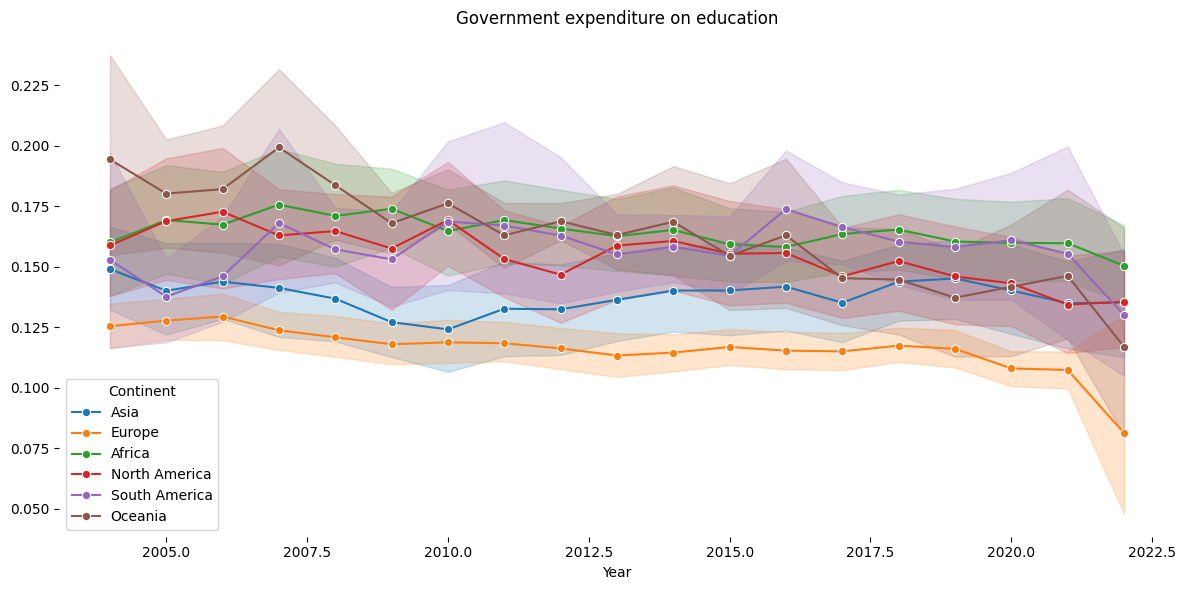

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_gov_exp,
    x='Year',
    y='Government expenditure on education, total (% of government expenditure)',
    hue='Continent',
    marker='o'
)

plt.title('Government expenditure on education')
plt.xlabel('Year')
plt.ylabel('')  # Rimuove il titolo dell'asse Y

plt.legend(title='Continent')

# Rimuove la griglia
plt.grid(False)

# Rimuove i bordi (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

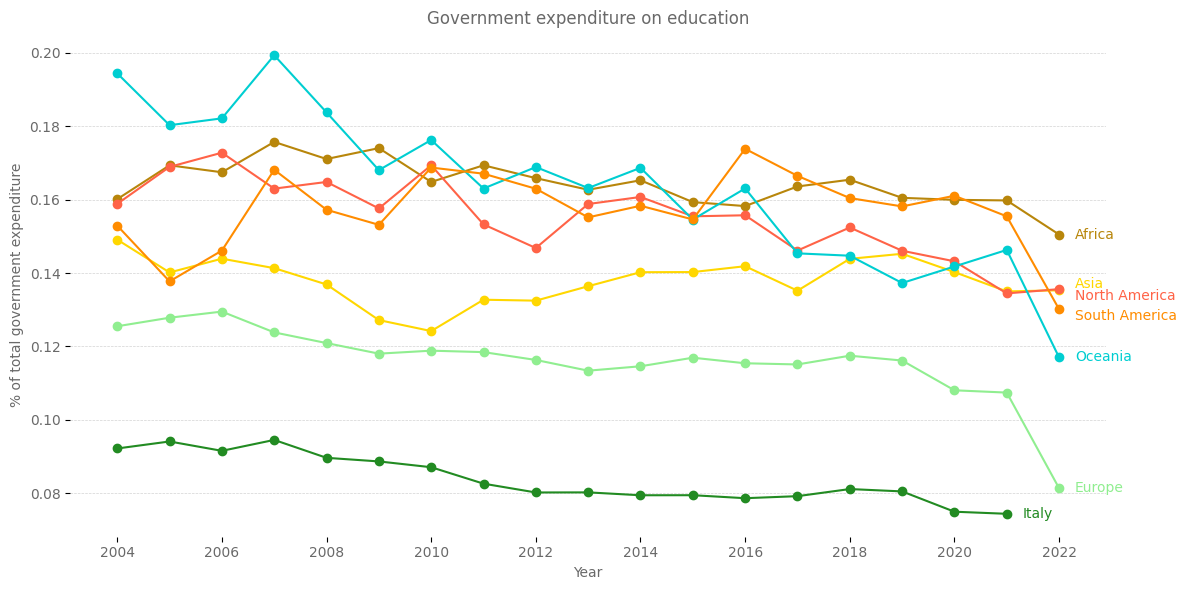

In [19]:
plt.figure(figsize=(12, 6))

# Colori personalizzati per continenti + Italia
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Media per anno e continente
df_plot = df_gov_exp.groupby(['Continent', 'Year'])[
    'Government expenditure on education, total (% of government expenditure)'
].mean().reset_index()

# Plot linee per ciascun continente
continents = df_plot['Continent'].unique()
for continent in continents:
    df_sub = df_plot[df_plot['Continent'] == continent]
    color = custom_colors.get(continent, 'gray')

    plt.plot(df_sub['Year'], df_sub['Government expenditure on education, total (% of government expenditure)'],
             label=continent, color=color, marker='o')

    # Etichetta finale con offset personalizzato
    last_year = df_sub['Year'].max()
    last_value = df_sub[df_sub['Year'] == last_year][
        'Government expenditure on education, total (% of government expenditure)'
    ].values[0]

    if continent == 'Asia':
        y_offset = 0.0018
    elif continent == 'North America':
        y_offset = -0.0018
    elif continent == 'South America':
        y_offset = -0.0018
    else:
        y_offset = 0

    plt.text(last_year + 0.3, last_value + y_offset, continent, color=color, va='center')

# Linea per Italia
df_italy = df_gov_exp[df_gov_exp['Country Name'] == 'Italy']
plt.plot(df_italy['Year'], df_italy['Government expenditure on education, total (% of government expenditure)'],
         label='Italy', color=custom_colors['Italy'], marker='o')

# Etichetta finale per Italia
df_italy_valid = df_italy.dropna(subset=['Government expenditure on education, total (% of government expenditure)'])
last_year_italy = df_italy_valid['Year'].max()
last_value_italy = df_italy_valid[df_italy_valid['Year'] == last_year_italy][
    'Government expenditure on education, total (% of government expenditure)'
].values[0]
plt.text(last_year_italy + 0.3, last_value_italy, 'Italy', color=custom_colors['Italy'], va='center')

# Asse e titolo con colore grigio scuro
plt.xlabel('Year', color='dimgray')
plt.ylabel('% of total government expenditure', color='dimgray')
plt.title('Government expenditure on education', color='dimgray')

# Griglia leggera solo orizzontale
plt.grid(True, axis='y', color='lightgray', linestyle='--', linewidth=0.5)

# Rimuove bordi
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Ticks x ogni 2 anni
years = sorted(df_plot['Year'].unique())
plt.xticks(
    ticks=years[::2],
    labels=years[::2],
    color='dimgray'
)
plt.yticks(color='dimgray')


# Rimuovi legenda
plt.legend().remove()

plt.tight_layout()
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_20924\1481257519.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


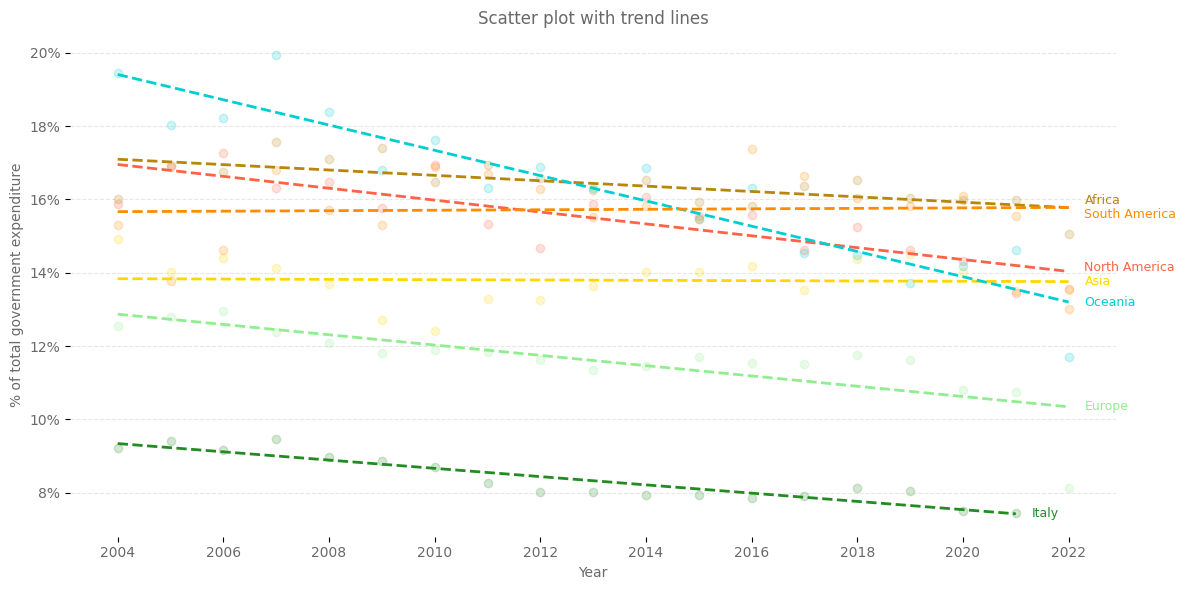

In [8]:
plt.figure(figsize=(12,6))
ax = plt.gca()

continents = df_plot['Continent'].unique()

custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

for continent in continents:
    df_sub = df_plot[df_plot['Continent'] == continent]
    line_color = custom_colors.get(continent, 'gray')  # fallback se manca

    # Punto più chiaro: trasparenza alpha=0.2
    point_color = colors.to_rgba(line_color, alpha=0.2)
    
    # Scatter punti
    plt.scatter(df_sub['Year'], df_sub['Government expenditure on education, total (% of government expenditure)'],
                color=point_color)
    
    # Linea di tendenza
    z = np.polyfit(df_sub['Year'], df_sub['Government expenditure on education, total (% of government expenditure)'], 1)
    p = np.poly1d(z)
    plt.plot(df_sub['Year'], p(df_sub['Year']), linestyle='--', color=line_color, linewidth=2)
    
    # Etichetta finale sulla linea di tendenza per l'ultimo anno
    last_year = df_sub['Year'].max()
    last_value = p(last_year)

    # Offset personalizzati
    if continent == 'Africa':
        last_value += 0.002
    elif continent == 'South America':
        last_value -= 0.002
    elif continent == 'North America':
        last_value += 0.0012

    plt.text(last_year + 0.3, last_value, continent, color=line_color, va='center', fontsize=9)

# Linea di tendenza per Italia
df_italy_valid = df_italy.dropna(subset=['Government expenditure on education, total (% of government expenditure)'])
line_color_italy = custom_colors['Italy']
point_color_italy = colors.to_rgba(line_color_italy, alpha=0.2)

plt.scatter(df_italy_valid['Year'], df_italy_valid['Government expenditure on education, total (% of government expenditure)'],
            color=point_color_italy)

# Fit linea di tendenza per Italia
z_italy = np.polyfit(df_italy_valid['Year'], df_italy_valid['Government expenditure on education, total (% of government expenditure)'], 1)
p_italy = np.poly1d(z_italy)
plt.plot(df_italy_valid['Year'], p_italy(df_italy_valid['Year']),
         color=line_color_italy, linewidth=2, linestyle='--')

# Etichetta finale Italia sulla linea di tendenza
last_year_italy = df_italy_valid['Year'].max()
last_value_italy = p_italy(last_year_italy)
plt.text(last_year_italy + 0.3, last_value_italy, 'Italy', 
         color=line_color_italy, va='center', fontsize=9)

# Rimuove bordi (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Scatter plot with trend lines', color='dimgray')
plt.xlabel('Year', color='dimgray')
plt.ylabel('% of total government expenditure', color='dimgray')

# Anni ogni 2, da 2004
plt.xticks(ticks=range(2004, df_plot['Year'].max() + 1, 2), color='dimgray')
from matplotlib.ticker import PercentFormatter

plt.yticks(color='dimgray')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
ax.yaxis.grid(True, linestyle='--', alpha=0.3)


# Rimuove legenda
plt.legend().remove()

plt.tight_layout()
plt.show()

### School Enrollment Rate

In [20]:
sch_enr = ['Country Name','Continent','Year',
             'School enrollment, primary (% gross)']
df_sch_enr = df[sch_enr]
df_sch_enr.head()

,Country Name,Continent,Year,"School enrollment, primary (% gross)"
0,Afghanistan,Asia,2004,1.062527
1,Afghanistan,Asia,2005,1.002297
2,Afghanistan,Asia,2006,1.039322
3,Afghanistan,Asia,2007,1.010865
4,Afghanistan,Asia,2008,1.034140


In [21]:
#Remove year 2023 as it contains just missing values
df_sch_enr = df_sch_enr[df_sch_enr['Year'] != 2023]

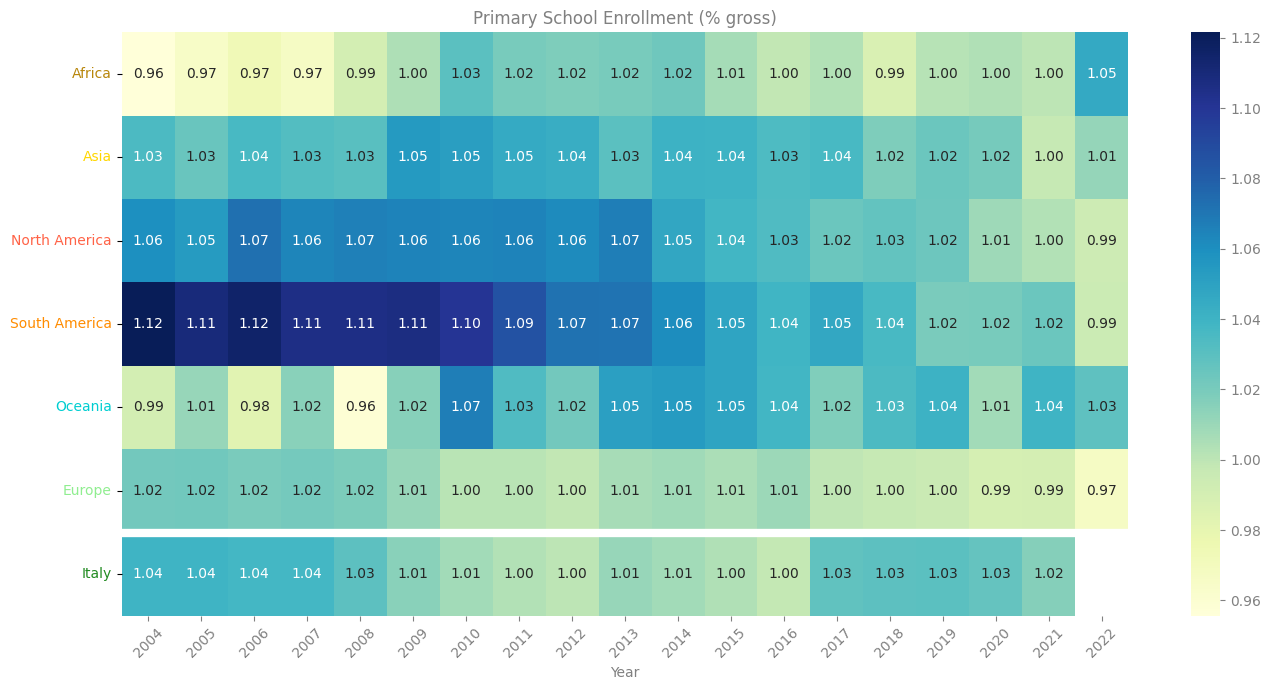

In [22]:
df_pivot = df_sch_enr.pivot_table(
    index='Continent',
    columns='Year',
    values='School enrollment, primary (% gross)',
    aggfunc='mean'  # oppure 'median', 'max', 'min' a seconda del tuo obiettivo
)

df_pivot.index = df_pivot.index.str.strip()
order = ['Africa', 'Asia', 'North America', 'South America', 'Oceania', 'Europe', 'Italy']
df_pivot = df_pivot.reindex(order)

italy_row = df_sch_enr[df_sch_enr['Country Name'] == 'Italy'] \
    .groupby('Year')['School enrollment, primary (% gross)'] \
    .mean()

# Aggiungilo come nuova riga
df_pivot.loc['Italy'] = italy_row

plt.figure(figsize=(14, 7))
ax = sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

plt.title('Primary School Enrollment (% gross)', color='gray')
plt.xlabel('Year', color='gray')
plt.ylabel('')

# Colore grigio per ticks asse x

ax.tick_params(axis='x', colors='gray', rotation=45)

# Rimuove label colorbar (la scritta sotto la barra)

cbar = ax.collections[0].colorbar
cbar.set_label('')

cbar.ax.yaxis.set_tick_params(color='gray')
plt.setp(cbar.ax.get_yticklabels(), color='gray')

# Colora i nomi asse y secondo custom\_colors

yticks = ax.get_yticklabels()
for label in yticks:
    text = label.get_text()
    if text in custom_colors:
            label.set_color(custom_colors[text])
    ax.set_yticklabels(yticks)
    plt.draw()

ax.hlines(6, *ax.get_xlim(), colors='white', linewidth=6)

plt.tight_layout()
plt.show()

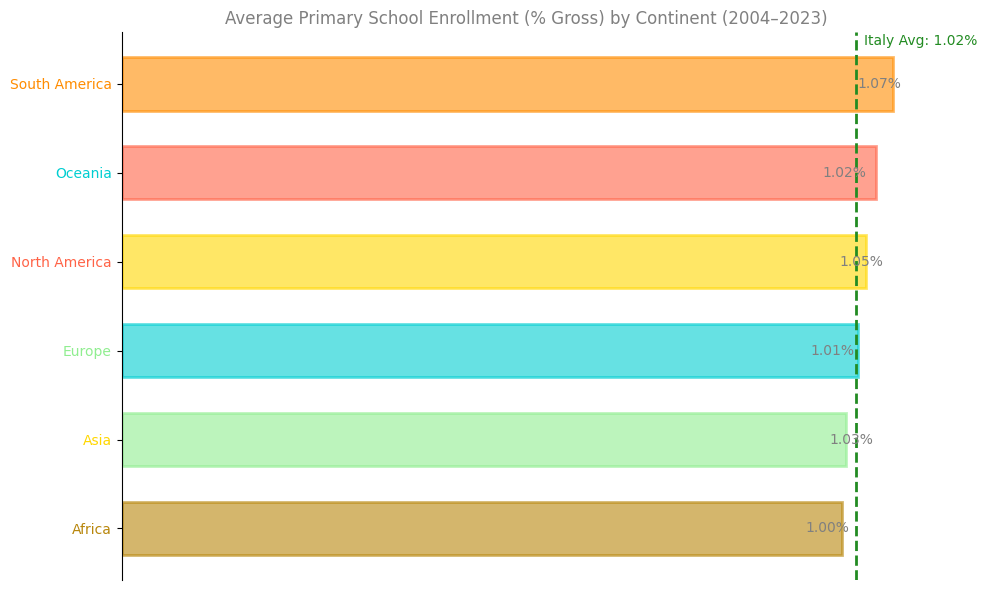

In [39]:
# Colori sfumati chiari per l'interno delle barre (usiamo alpha per semplificare)
fill_alpha = 0.6  # livello di trasparenza per il riempimento
df_sch_enr = df[sch_enr].dropna()

df_continent_avg = df_sch_enr.groupby('Continent')['School enrollment, primary (% gross)'].mean().reset_index()
italy_avg = df_sch_enr[df_sch_enr['Country Name'] == 'Italy']['School enrollment, primary (% gross)'].mean()

# Ordina i dati per visualizzazione chiara
df_continent_avg.sort_values('School enrollment, primary (% gross)', inplace=True)

# Inizializza il plot
plt.figure(figsize=(10, 6))

# Disegna le barre una a una (personalizzando fill e bordo)
for i, row in df_continent_avg.iterrows():
    continent = row['Continent']
    value = row['School enrollment, primary (% gross)']
    color = custom_colors[continent]

    plt.barh(
        y=continent,
        width=value,
        color=color,
        edgecolor=color,
        alpha=fill_alpha,
        height=0.6,
        linewidth=2
    )

    # Etichetta numerica accanto alla barra
    plt.text(
        value -0.05, i, f'{value:.2f}%',  # posizionata più vicina
        va='center',
        ha='left',
        color='gray',
        fontsize=10
    )

# Linea orizzontale per la media Italia
italy_index = df_continent_avg[df_continent_avg['Continent'] == 'Europe'].index[0]  # Italia è in Europa
plt.axvline(italy_avg, color=custom_colors['Italy'], linestyle='--', linewidth=2)

# Etichetta media Italia in alto a destra
plt.text(
    italy_avg + 0.01, italy_index + 3.4,  # piccolo offset verso l’alto e destra
    f"Italy Avg: {italy_avg:.2f}%",
    color=custom_colors['Italy'],
    fontsize=10,
    ha='left',
    va='bottom'
)

# Asse Y: colora etichette come la barra
ax = plt.gca()
ax.set_yticks(range(len(continents)))
ax.set_yticklabels(continents, fontsize=10)
for label in ax.get_yticklabels():
    continent = label.get_text()
    label.set_color(custom_colors.get(continent, 'gray'))

# Rimuovi asse X
plt.xticks([])
plt.xlabel('')
plt.title('Average Primary School Enrollment (% Gross) by Continent (2004–2023)', color='gray')
plt.yticks(fontsize=10)
plt.grid(False)
sns.despine(left=False, bottom=True)

plt.tight_layout()
plt.show()

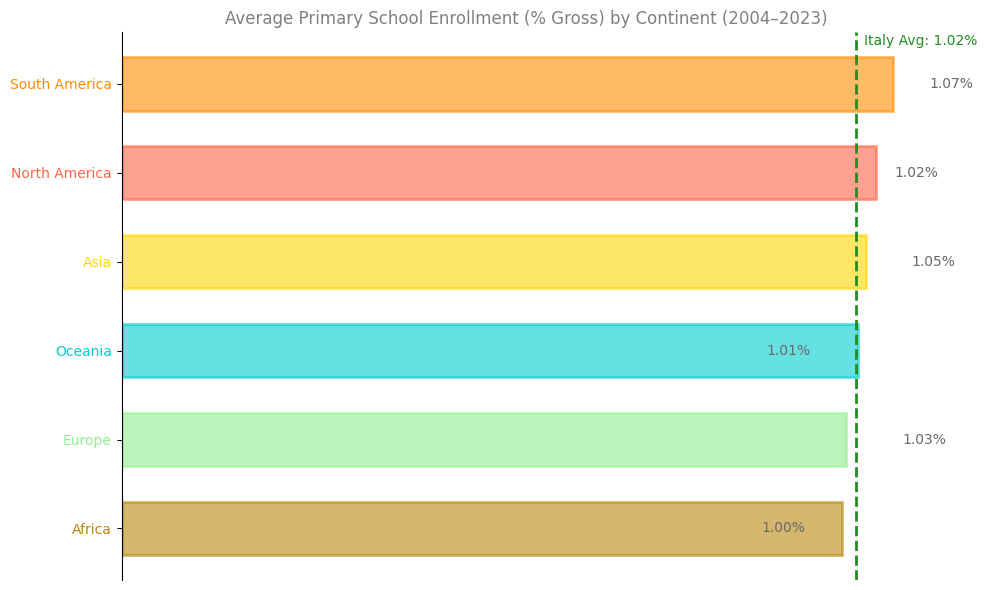

In [43]:
fill_alpha = 0.6
text_color = 'dimgray'  # più scuro per i numeri

df_sch_enr = df[sch_enr].dropna()

# Calcoli medi
df_continent_avg = df_sch_enr.groupby('Continent')['School enrollment, primary (% gross)'].mean().reset_index()
italy_avg = df_sch_enr[df_sch_enr['Country Name'] == 'Italy']['School enrollment, primary (% gross)'].mean()

# Ordina per chiarezza
df_continent_avg.sort_values('School enrollment, primary (% gross)', inplace=True)
continents = df_continent_avg['Continent'].tolist()

# Inizializza il plot
plt.figure(figsize=(10, 6))

# Barre orizzontali
for i, row in df_continent_avg.iterrows():
    continent = row['Continent']
    value = row['School enrollment, primary (% gross)']
    color = custom_colors[continent]

    plt.barh(
        y=continent,
        width=value,
        color=color,
        edgecolor=color,
        alpha=fill_alpha,
        height=0.6,
        linewidth=2
    )

    # Etichetta numerica: posizione variabile in base alla media italiana
    if value >= italy_avg:
        ha_align = 'left'
        offset = 0.05
    else:
        ha_align = 'right'
        offset = -0.05

    plt.text(
        value + offset, i,
        f'{value:.2f}%',
        va='center',
        ha=ha_align,
        color=text_color,
        fontsize=10
    )

# Linea media Italia
italy_index = df_continent_avg[df_continent_avg['Continent'] == 'Europe'].index[0]
plt.axvline(italy_avg, color=custom_colors['Italy'], linestyle='--', linewidth=2)

# Etichetta media Italia in alto a destra
plt.text(
    italy_avg + 0.01, italy_index + 3.4,
    f"Italy Avg: {italy_avg:.2f}%",
    color=custom_colors['Italy'],
    fontsize=10,
    ha='left',
    va='bottom'
)

# Etichette asse Y colorate
ax = plt.gca()
ax.set_yticks(range(len(continents)))
ax.set_yticklabels(continents, fontsize=10)
for label in ax.get_yticklabels():
    continent = label.get_text()
    label.set_color(custom_colors.get(continent, 'gray'))

# Pulizia finale
plt.xticks([])  # rimuove asse X
plt.xlabel('')
plt.title('Average Primary School Enrollment (% Gross) by Continent (2004–2023)', color='gray')
plt.grid(False)
sns.despine(left=False, bottom=True)

plt.tight_layout()
plt.show()

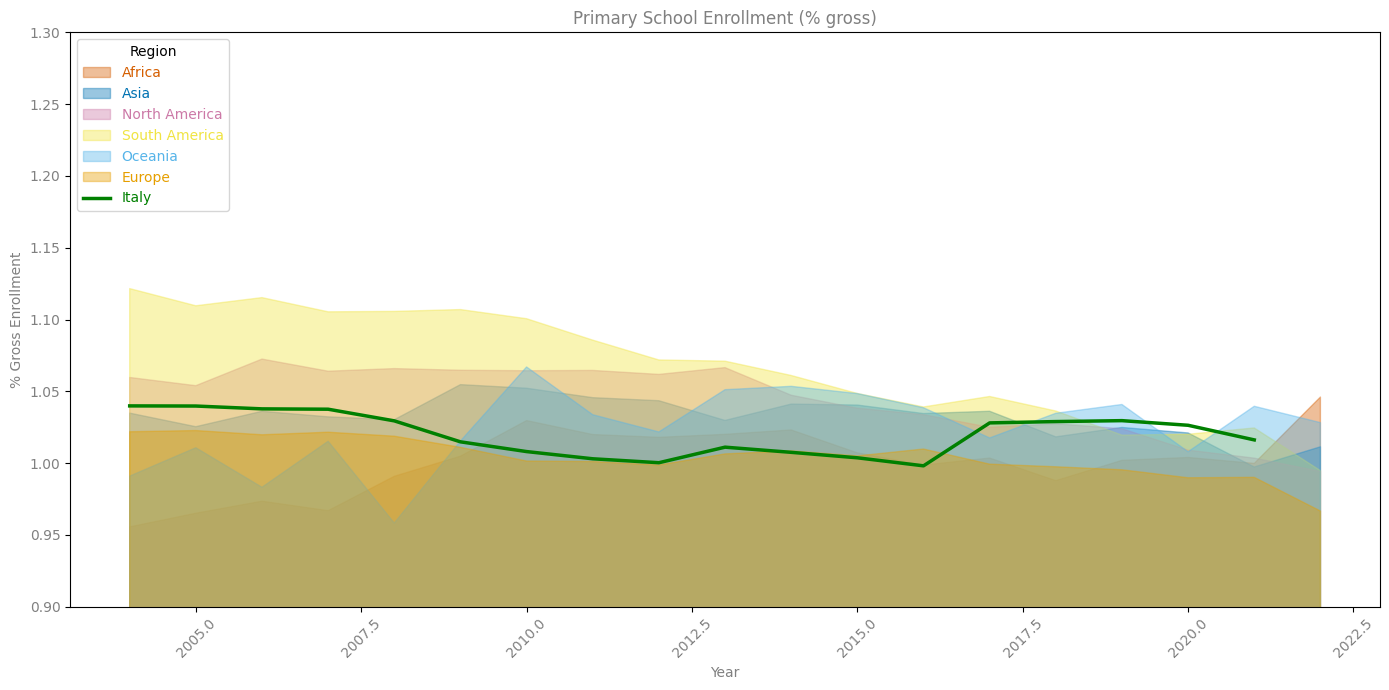

In [23]:
plt.figure(figsize=(14, 7))

# Plot area per tutte le regioni tranne l'Italia
for region in df_area.columns:
    if region == 'Italy':
        continue
    plt.fill_between(
        df_area.index,
        df_area[region],
        alpha=0.4,
        label=region,
        color=custom_colors.get(region, 'gray')
    )

# Linea per l’Italia
plt.plot(
    df_area.index,
    df_area['Italy'],
    color='green',
    linewidth=2.5,
    label='Italy'
)

# Zoom sull'intervallo 90%–130%
plt.ylim(0.9, 1.3)

# Stile grafico
plt.title('Primary School Enrollment (% gross)', color='gray')
plt.xlabel('Year', color='gray')
plt.ylabel('% Gross Enrollment', color='gray')
plt.xticks(rotation=45, color='gray')
plt.yticks(color='gray')

# Legenda con colori personalizzati
legend = plt.legend(title='Region', loc='upper left')
for text in legend.get_texts():
    name = text.get_text()
    if name in custom_colors:
        text.set_color(custom_colors[name])

plt.tight_layout()
plt.show()


## Employment

### Labor force participation rate

In [12]:
lab_force = ['Country Name','Continent','Year',
            'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']
df_lab_force = df[lab_force]
df_lab_force.head()

,Country Name,Continent,Year,"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)"
0,Afghanistan,Asia,2004,0.48079
1,Afghanistan,Asia,2005,0.48169
2,Afghanistan,Asia,2006,0.48098
3,Afghanistan,Asia,2007,0.48054
4,Afghanistan,Asia,2008,0.48018


In [13]:
#Remove year 2023 as it contains just missing values
df_lab_force = df_lab_force[df_lab_force['Year'] != 2023]

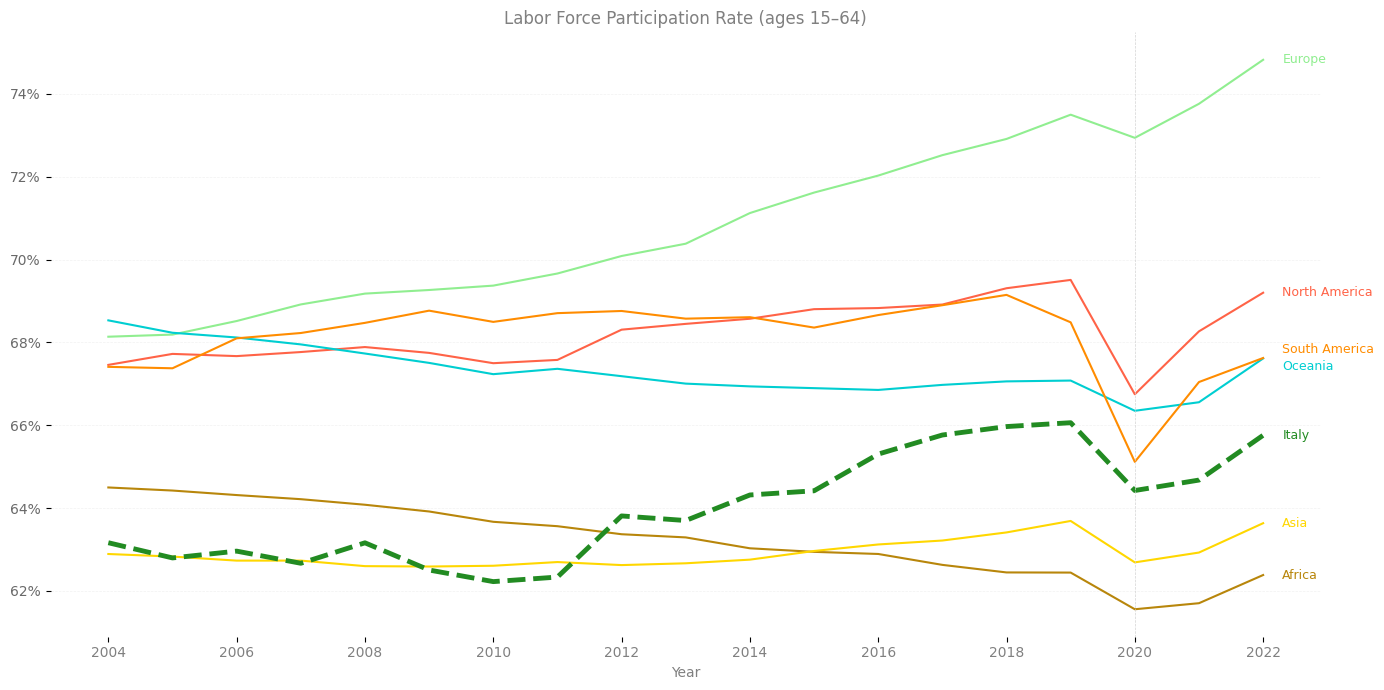

In [14]:
# Pulizia e preparazione dati
df_clean = df_lab_force.dropna(subset=[
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)'
])
df_clean = df_clean.rename(columns={
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'Participation Rate'
})

# Media per continente per anno
df_grouped = df_clean.groupby(['Year', 'Continent'])['Participation Rate'].mean().reset_index()

# Dati per Italia
df_italy = df_clean[df_clean['Country Name'] == 'Italy'][['Year', 'Participation Rate']]
df_italy['Continent'] = 'Italy'

# Unione
df_combined = pd.concat([df_grouped, df_italy], ignore_index=True)

# Ordine dei continenti
order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Italy']

# Colori personalizzati
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Plot
plt.figure(figsize=(14, 7))
ax = plt.gca()

for continent in order:
    df_sub = df_combined[df_combined['Continent'] == continent]
    if not df_sub.empty:
        color = custom_colors.get(continent, 'gray')
        linewidth = 3.5 if continent == 'Italy' else 1.5  # più spessa per l’Italia
        linestyle = '--' if continent == 'Italy' else '-'  # tratteggiata solo per Italia

        plt.plot(df_sub['Year'], df_sub['Participation Rate'], label=continent,
                 color=color, linewidth=linewidth, linestyle=linestyle)

        # Etichetta finale
        last_year = df_sub['Year'].max()
        last_val = df_sub[df_sub['Year'] == last_year]['Participation Rate'].values[0]

        # Offset personalizzato per etichette
        if continent == 'South America':
            offset = 0.002
        elif continent == 'Oceania':
            offset = -0.002
        else:
            offset = 0

        plt.text(last_year + 0.3, last_val + offset, continent, color=color,
                 va='center', fontsize=9)


# Ticks asse X ogni 2 anni
min_year = int(df_combined['Year'].min())
max_year = int(df_combined['Year'].max())
plt.xticks(ticks=range(min_year, max_year + 1, 2), color='gray')

# Y ticks in %
plt.yticks(color='dimgray')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

# Asse Y: rimuove label
plt.ylabel('')

# Asse X e titolo
plt.xlabel('Year', color='gray')
plt.title('Labor Force Participation Rate (ages 15–64)', color='gray')

# Griglia e linea 2020
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')
plt.axvline(x=2020, color='lightgray', linestyle='--', linewidth=0.5)

# Rimuove bordi
for spine in ax.spines.values():
    spine.set_visible(False)

# Rimuove legenda
plt.legend().remove()

plt.tight_layout()
plt.show()

### Unemployment rate

In [15]:
unemp = ['Country Name','Continent','Year',
          'Unemployment, total (% of total labor force) (modeled ILO estimate)']
df_unemp = df[unemp]
df_unemp.head()

,Country Name,Continent,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,Asia,2004,0.07926
1,Afghanistan,Asia,2005,0.07925
2,Afghanistan,Asia,2006,0.07925
3,Afghanistan,Asia,2007,0.07924
4,Afghanistan,Asia,2008,0.07928


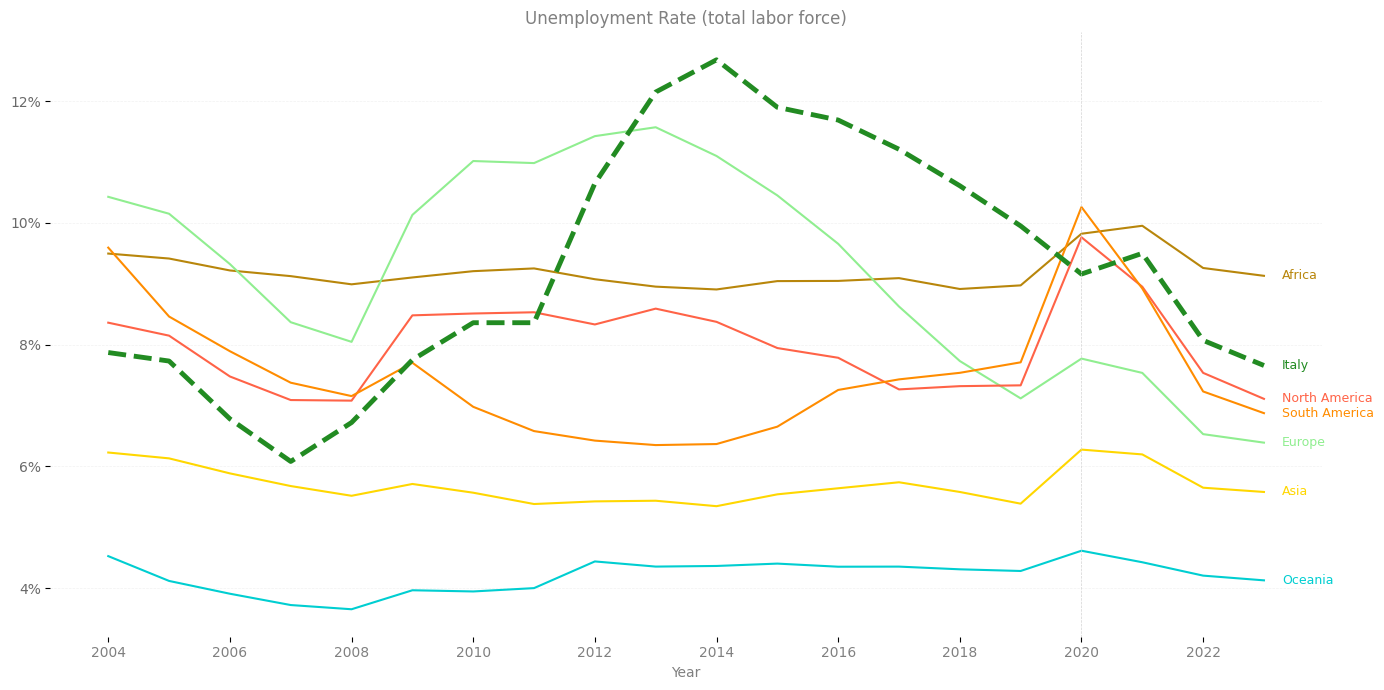

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Pulizia e preparazione dati
df_unemp_clean = df_unemp.dropna(subset=[
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
])
df_unemp_clean = df_unemp_clean.rename(columns={
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment Rate'
})

# Media per continente per anno
df_grouped = df_unemp_clean.groupby(['Year', 'Continent'])['Unemployment Rate'].mean().reset_index()

# Dati per Italia
df_italy = df_unemp_clean[df_unemp_clean['Country Name'] == 'Italy'][['Year', 'Unemployment Rate']]
df_italy['Continent'] = 'Italy'

# Unione
df_combined = pd.concat([df_grouped, df_italy], ignore_index=True)

# Ordine dei continenti
order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Italy']

# Colori personalizzati
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

plt.figure(figsize=(14, 7))
ax = plt.gca()

for continent in order:
    df_sub = df_combined[df_combined['Continent'] == continent]
    if not df_sub.empty:
        color = custom_colors.get(continent, 'gray')
        linewidth = 3.5 if continent == 'Italy' else 1.5
        linestyle = '--' if continent == 'Italy' else '-'

        plt.plot(df_sub['Year'], df_sub['Unemployment Rate'], label=continent,
                 color=color, linewidth=linewidth, linestyle=linestyle)

        # Etichetta finale
        last_year = df_sub['Year'].max()
        last_val = df_sub[df_sub['Year'] == last_year]['Unemployment Rate'].values[0]

        plt.text(last_year + 0.3, last_val + offset, continent, color=color,
                 va='center', fontsize=9)

# Asse X: ticks ogni 2 anni
min_year = int(df_combined['Year'].min())
max_year = int(df_combined['Year'].max())
plt.xticks(ticks=range(min_year, max_year + 1, 2), color='gray')

# Asse Y: percentuali
plt.yticks(color='dimgray')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

plt.ylabel('')
plt.xlabel('Year', color='gray')
plt.title('Unemployment Rate (total labor force)', color='gray')

plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')
plt.axvline(x=2020, color='lightgray', linestyle='--', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.legend().remove()

plt.tight_layout()
plt.show()


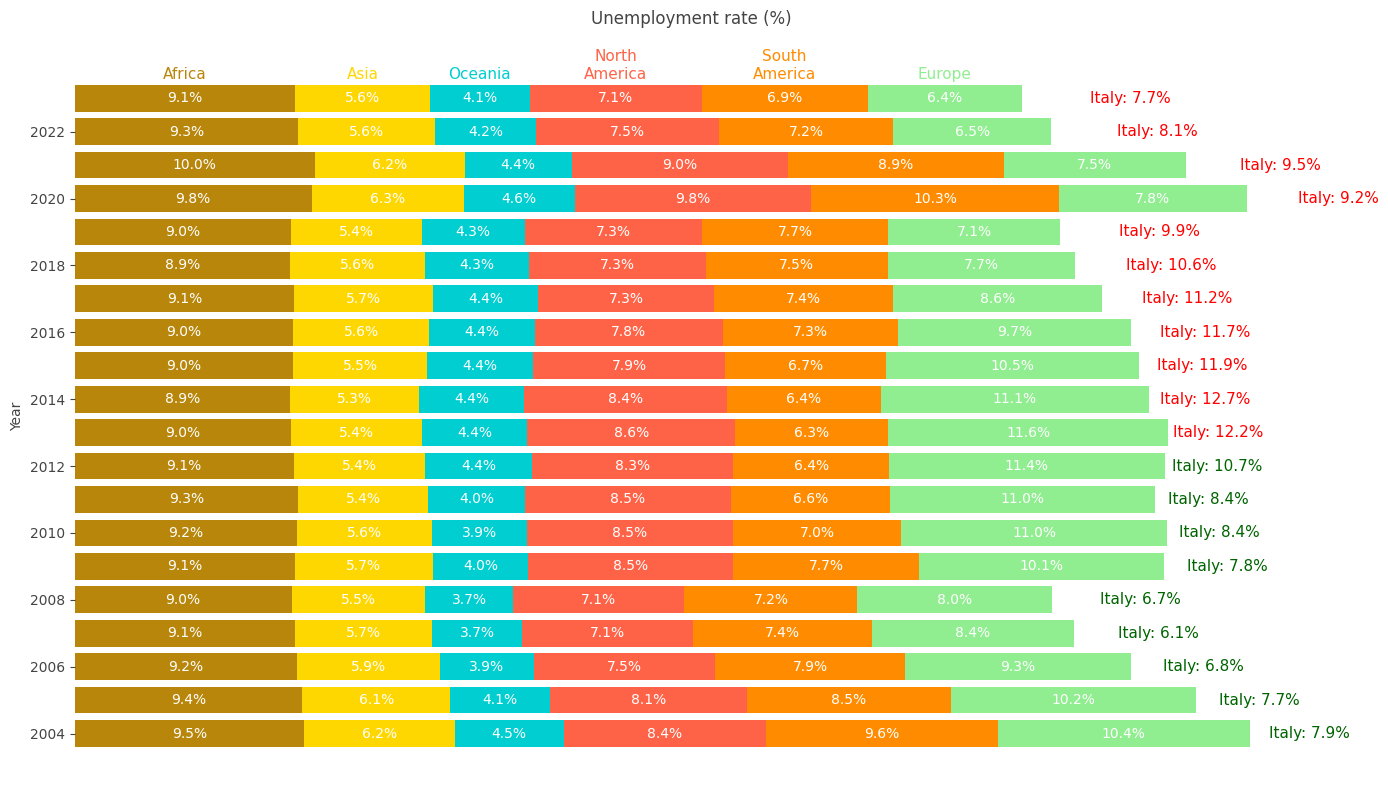

In [17]:
import matplotlib.pyplot as plt
import numpy as np

custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

df_unemp = df_unemp.rename(columns={'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment'})

pivot = df_unemp.pivot_table(
    index='Year',
    columns='Continent',
    values='Unemployment',
    aggfunc='mean'
).fillna(0)

# Ordina colonne: tutti tranne NA, SA, Europe, poi NA, SA, Europe
all_conts = set(pivot.columns)
for c in ['North America', 'South America', 'Europe']:
    all_conts.discard(c)

order = sorted(all_conts)  # altri continenti in ordine alfabetico
if 'North America' in pivot.columns:
    order.append('North America')
if 'South America' in pivot.columns:
    order.append('South America')
if 'Europe' in pivot.columns:
    order.append('Europe')

pivot = pivot[order]
continents = pivot.columns

italy = df_unemp[df_unemp['Country Name'] == 'Italy'].set_index('Year')['Unemployment']
pivot = pivot.sort_index()
italy = italy.reindex(pivot.index)

years = pivot.index

fig, ax = plt.subplots(figsize=(14, 8))

lefts = np.zeros(len(years))

def get_color(name):
    return custom_colors.get(name, '#555555')

for cont in continents:
    vals = pivot[cont].values
    color = get_color(cont)
    bars = ax.barh(years, vals, left=lefts, label=cont, color=color, edgecolor='none')
    
    # Percentuali dentro la barra per tutte le righe, testo bianco semplice, 1 decimale e simbolo %
    for bar, val in zip(bars, vals):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_y() + bar.get_height()/2,
            f'{val*100:.1f}%',
            ha='center', va='center',
            fontsize=10,
            color='white'
        )
    lefts += vals

def split_name(name):
    parts = name.split()
    if len(parts) > 1:
        return '\n'.join(parts)
    else:
        return name

top_year = years[-1]
lefts_for_labels = 0

for cont in continents:
    val = pivot.loc[top_year, cont]
    xpos = lefts_for_labels + val / 2
    ax.text(
        xpos,
        top_year + 0.5,
        split_name(cont),
        ha='center',
        va='bottom',
        fontsize=11,
        color=get_color(cont),
    )
    lefts_for_labels += val

# Valori Italia a lato vicino Europa, colore rosso se minore, verde scuro se maggiore
for y in years:
    val_italy = italy.get(y)
    val_europe = pivot.loc[y, 'Europe'] if 'Europe' in pivot.columns else None
    if pd.notna(val_italy) and pd.notna(val_europe):
        left_before_europe = 0
        for cont in continents:
            if cont == 'Europe':
                break
            left_before_europe += pivot.loc[y, cont]
        xpos_europe = left_before_europe + val_europe / 2
        
        offset = 0.06  # offset ridotto per avvicinare
        xpos_italy = xpos_europe + offset
        
        color_italy = 'darkgreen' if val_italy < val_europe else 'red'
        
        ax.text(
            xpos_italy, y,
            f'Italy: {val_italy*100:.1f}%',
            va='center',
            fontsize=11,
            #fontweight='bold',
            color=color_italy
        )

# Metti in grigio scuro gli altri testi (assi, titolo)
gray_color = '#444444'
ax.set_ylabel('Year', color=gray_color)
ax.set_title('Unemployment rate (%)', color=gray_color,  pad=20)

for spine in ax.spines.values():
    spine.set_visible(False)

if ax.get_legend():
    ax.get_legend().remove()

# Imposta ticks sull’asse y ogni 2 anni, label in grigio
year_ticks = years[::2]
ax.set_yticks(year_ticks)
ax.set_yticklabels(year_ticks, color=gray_color)

# Anche i tick sull’asse y in grigio
ax.tick_params(axis='y', colors=gray_color)

# Nascondi completamente l'asse x
ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()


## Correlations

### Labor Force Participation and Unemployment

C:\Users\angel\AppData\Local\Temp\ipykernel_20924\1858320710.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


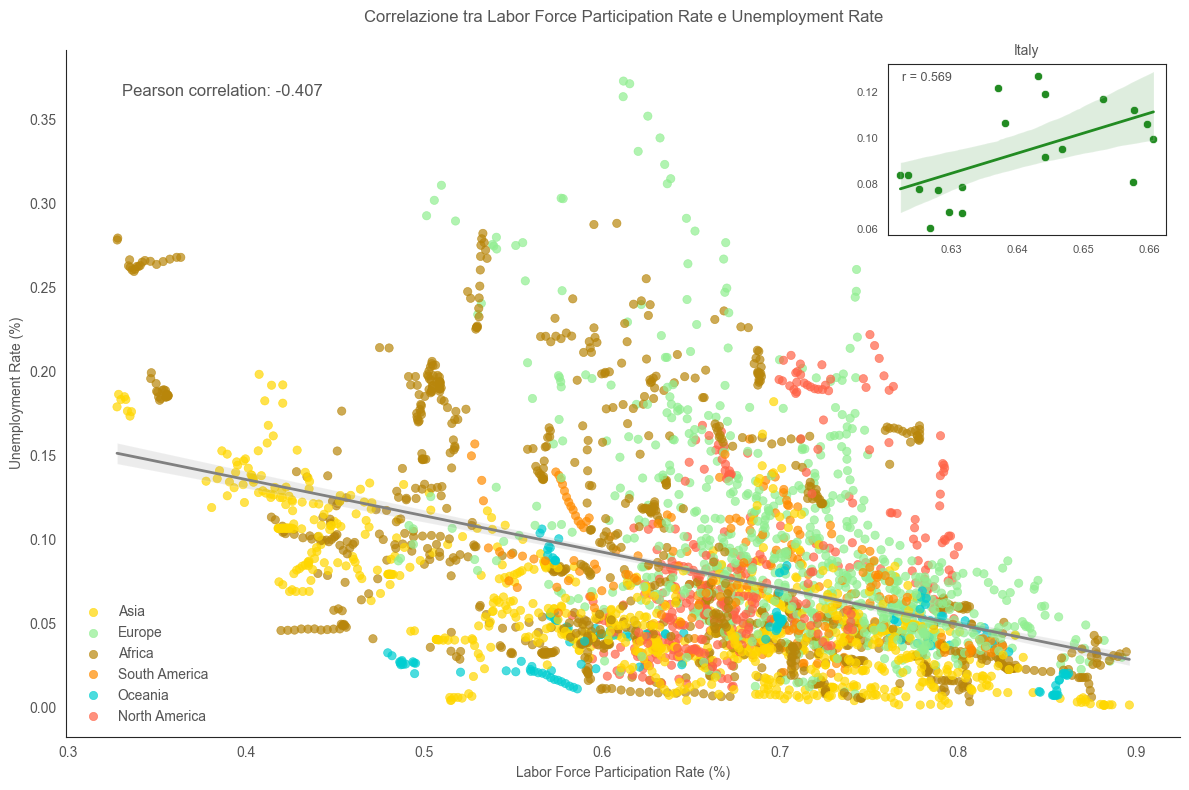

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Rinominare colonne
df_lab_force = df_lab_force.rename(columns={
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'LaborForceParticipation'
})
df_unemp = df_unemp.rename(columns={
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment'
})

# Merge
df_corr = pd.merge(
    df_lab_force,
    df_unemp,
    on=['Country Name', 'Continent', 'Year'],
    how='inner'
)

# Pulizia
df_corr = df_corr.dropna(subset=['LaborForceParticipation', 'Unemployment'])
df_italy = df_corr[df_corr['Country Name'] == 'Italy']

gray_color = '#555555'

plt.figure(figsize=(12, 8))
sns.set_style("white")

# Plot principale
ax = sns.scatterplot(
    data=df_corr,
    x='LaborForceParticipation',
    y='Unemployment',
    hue='Continent',
    palette=custom_colors,
    alpha=0.7,
    edgecolor=None
)

# Linea di regressione globale
sns.regplot(
    data=df_corr,
    x='LaborForceParticipation',
    y='Unemployment',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 2},
    ax=ax
)

# Titoli e label grigi
ax.set_title('Correlazione tra Labor Force Participation Rate e Unemployment Rate', color=gray_color, pad=20)
ax.set_xlabel('Labor Force Participation Rate (%)', color=gray_color)
ax.set_ylabel('Unemployment Rate (%)', color=gray_color)
ax.tick_params(colors=gray_color)

# Correlazione generale
corr = df_corr[['LaborForceParticipation', 'Unemployment']].corr().iloc[0, 1]
ax.text(
    0.05, 0.95,
    f'Pearson correlation: {corr:.3f}',
    transform=ax.transAxes,
    fontsize=12,
    color=gray_color,
    verticalalignment='top'
)

# Rimuove bordo
sns.despine()

# Sposta la legenda in basso a sinistra
legend = ax.legend(title='', frameon=False, loc='lower left')
plt.setp(legend.get_texts(), color=gray_color)

# Inset: mini grafico per l’Italia in alto a destra
ax_inset = inset_axes(ax, width="25%", height="25%", loc='upper right', borderpad=1)
sns.scatterplot(
    data=df_italy,
    x='LaborForceParticipation',
    y='Unemployment',
    color='forestgreen',
    ax=ax_inset
)
sns.regplot(
    data=df_italy,
    x='LaborForceParticipation',
    y='Unemployment',
    scatter=False,
    color='forestgreen',
    line_kws={'linewidth': 2},
    ax=ax_inset
)

# Calcola Pearson per l’Italia
corr_italy = df_italy[['LaborForceParticipation', 'Unemployment']].corr().iloc[0, 1]
ax_inset.set_title("Italy", fontsize=10, color=gray_color)
ax_inset.text(
    0.05, 0.95,
    f'r = {corr_italy:.3f}',
    transform=ax_inset.transAxes,
    fontsize=9,
    color=gray_color,
    verticalalignment='top'
)

# Estetica mini grafico
ax_inset.tick_params(labelsize=8, colors=gray_color)
ax_inset.set_xlabel('', color=gray_color)
ax_inset.set_ylabel('', color=gray_color)
ax_inset.grid(False)

plt.tight_layout()
plt.show()


### School Enrollment and Unemployment

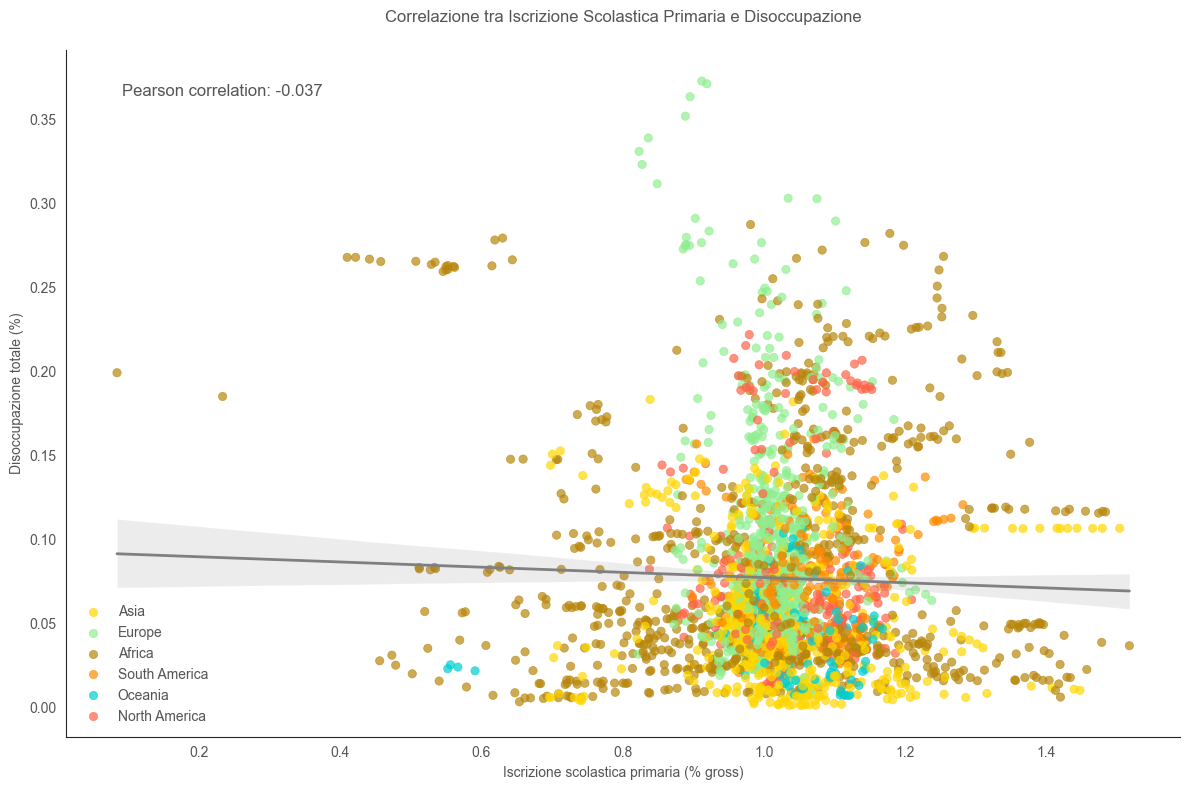

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selezione e rinomina colonne
df_unemp = df_unemp.rename(columns={
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment'
})
df_sch_enr = df_sch_enr.rename(columns={
    'School enrollment, primary (% gross)': 'SchoolEnrollment'
})

# Merge sui dati comuni
df_corr = pd.merge(
    df_unemp,
    df_sch_enr,
    on=['Country Name', 'Continent', 'Year'],
    how='inner'
)

# Rimuove righe con NaN
df_corr = df_corr.dropna(subset=['Unemployment', 'SchoolEnrollment'])

# Stile
gray_color = '#555555'
sns.set_style("white")

# Plot
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=df_corr,
    x='SchoolEnrollment',
    y='Unemployment',
    hue='Continent',
    palette=custom_colors,
    alpha=0.7,
    edgecolor=None
)

# Linea di regressione globale
sns.regplot(
    data=df_corr,
    x='SchoolEnrollment',
    y='Unemployment',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 2},
    ax=ax
)

# Etichette e titolo in grigio
ax.set_title('Correlazione tra Iscrizione Scolastica Primaria e Disoccupazione', color=gray_color, pad=20)
ax.set_xlabel('Iscrizione scolastica primaria (% gross)', color=gray_color)
ax.set_ylabel('Disoccupazione totale (%)', color=gray_color)
ax.tick_params(colors=gray_color)

# Pearson correlation
corr = df_corr[['SchoolEnrollment', 'Unemployment']].corr().iloc[0, 1]
ax.text(
    0.05, 0.95,
    f'Pearson correlation: {corr:.3f}',
    transform=ax.transAxes,
    fontsize=12,
    color=gray_color,
    verticalalignment='top'
)

# Legenda in basso a sinistra senza bordo
legend = ax.legend(title='', frameon=False, loc='lower left')
plt.setp(legend.get_texts(), color=gray_color)

# Rimuovi bordi
sns.despine()
plt.tight_layout()
plt.show()


### Government Expenditure on Education and Unemployment

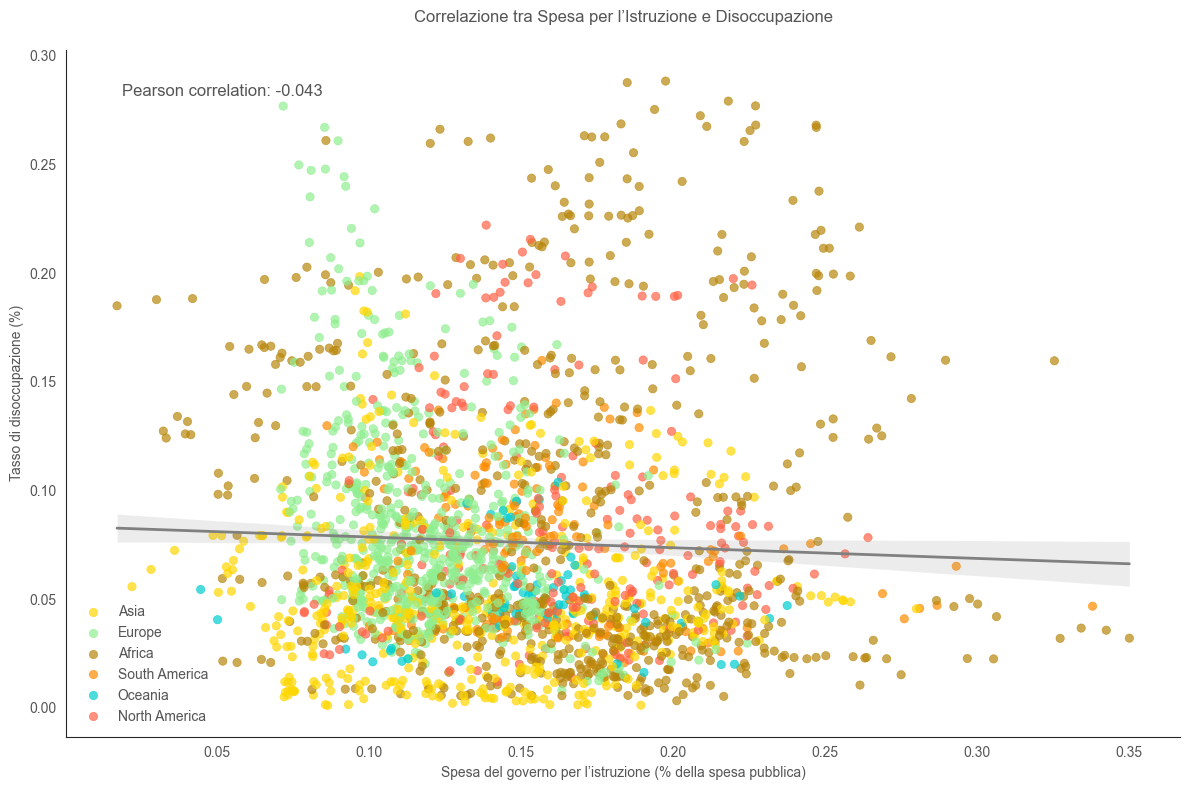

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rinomina colonne per semplificare
df_unemp = df_unemp.rename(columns={
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment'
})
df_gov_exp = df_gov_exp.rename(columns={
    'Government expenditure on education, total (% of government expenditure)': 'GovEducationExp'
})

# Merge dei due dataset
df_corr = pd.merge(
    df_unemp,
    df_gov_exp,
    on=['Country Name', 'Continent', 'Year'],
    how='inner'
)

# Pulizia dati
df_corr = df_corr.dropna(subset=['Unemployment', 'GovEducationExp'])

# Colore dei testi
gray_color = '#555555'

# Stile
sns.set_style("white")
plt.figure(figsize=(12, 8))

# Scatterplot
ax = sns.scatterplot(
    data=df_corr,
    x='GovEducationExp',
    y='Unemployment',
    hue='Continent',
    palette=custom_colors,
    alpha=0.7,
    edgecolor=None
)

# Linea di regressione globale
sns.regplot(
    data=df_corr,
    x='GovEducationExp',
    y='Unemployment',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 2},
    ax=ax
)

# Titoli e etichette in grigio
ax.set_title('Correlazione tra Spesa per l’Istruzione e Disoccupazione', color=gray_color, pad=20)
ax.set_xlabel('Spesa del governo per l’istruzione (% della spesa pubblica)', color=gray_color)
ax.set_ylabel('Tasso di disoccupazione (%)', color=gray_color)
ax.tick_params(colors=gray_color)

# Correlazione Pearson
corr = df_corr[['GovEducationExp', 'Unemployment']].corr().iloc[0, 1]
ax.text(
    0.05, 0.95,
    f'Pearson correlation: {corr:.3f}',
    transform=ax.transAxes,
    fontsize=12,
    color=gray_color,
    verticalalignment='top'
)

# Legenda senza bordo, in basso a sinistra
legend = ax.legend(title='', frameon=False, loc='lower left')
plt.setp(legend.get_texts(), color=gray_color)

# Rimuove i bordi
sns.despine()
plt.tight_layout()
plt.show()


### Governement Expenditure on Education and Labor Partecipation Rate

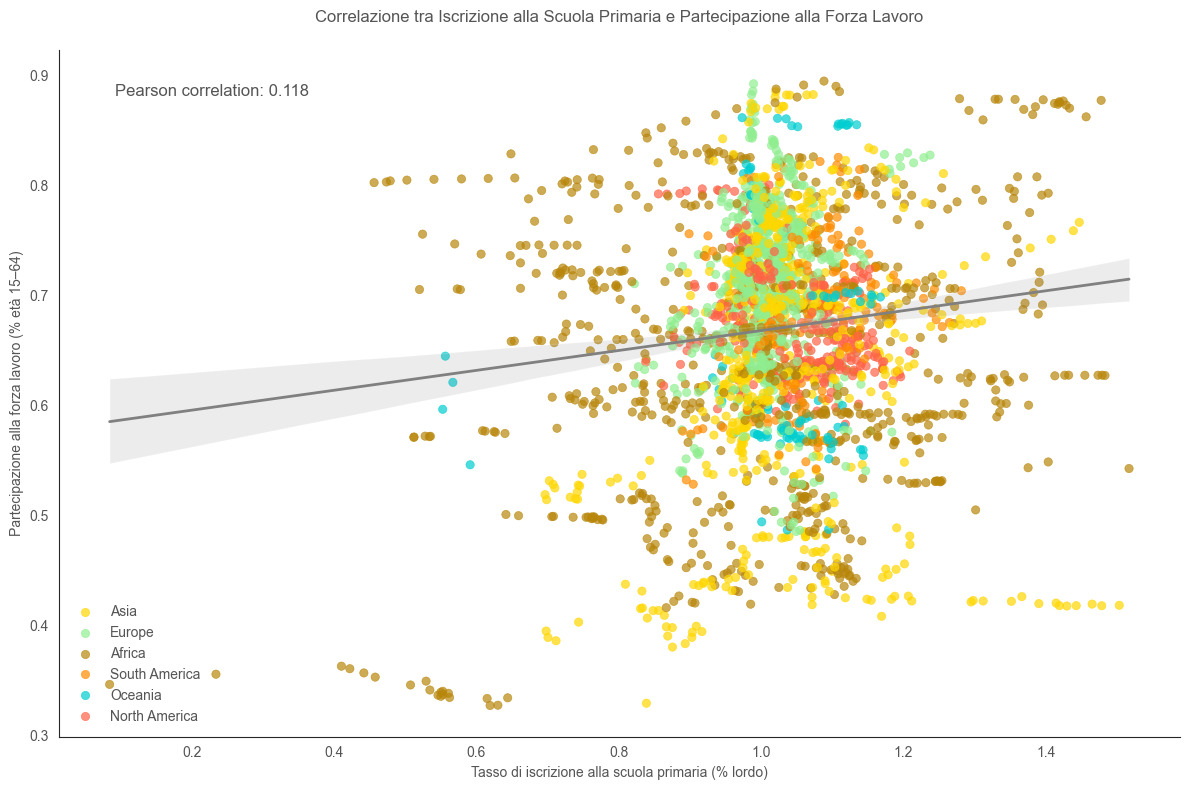

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rinomina colonne
df_lab_force = df_lab_force.rename(columns={
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'LaborForceParticipation'
})
df_sch_enr = df_sch_enr.rename(columns={
    'School enrollment, primary (% gross)': 'SchoolEnrollment'
})

# Merge
df_corr = pd.merge(
    df_lab_force,
    df_sch_enr,
    on=['Country Name', 'Continent', 'Year'],
    how='inner'
)

# Pulisci dati
df_corr = df_corr.dropna(subset=['LaborForceParticipation', 'SchoolEnrollment'])

# Colore grigio per testi
gray_color = '#555555'

# Plot
sns.set_style("white")
plt.figure(figsize=(12, 8))

# Scatterplot
ax = sns.scatterplot(
    data=df_corr,
    x='SchoolEnrollment',
    y='LaborForceParticipation',
    hue='Continent',
    palette=custom_colors,
    alpha=0.7,
    edgecolor=None
)

# Linea di regressione globale
sns.regplot(
    data=df_corr,
    x='SchoolEnrollment',
    y='LaborForceParticipation',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 2},
    ax=ax
)

# Pearson correlation
corr = df_corr[['SchoolEnrollment', 'LaborForceParticipation']].corr().iloc[0, 1]
ax.text(
    0.05, 0.95,
    f'Pearson correlation: {corr:.3f}',
    transform=ax.transAxes,
    fontsize=12,
    color=gray_color,
    verticalalignment='top'
)

# Titolo e assi
ax.set_title('Correlazione tra Iscrizione alla Scuola Primaria e Partecipazione alla Forza Lavoro', color=gray_color, pad=20)
ax.set_xlabel('Tasso di iscrizione alla scuola primaria (% lordo)', color=gray_color)
ax.set_ylabel('Partecipazione alla forza lavoro (% età 15–64)', color=gray_color)

# Tick in grigio
ax.tick_params(colors=gray_color)

# Legenda
legend = ax.legend(title='', frameon=False, loc='lower left')
plt.setp(legend.get_texts(), color=gray_color)

# Rimuovi bordo
sns.despine()
plt.tight_layout()
plt.show()
